## PRAKTIKUM

1. Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Loading Dataset

In [3]:
import pandas as pd

# Membaca file csv menggunakan pandas
df = pd.read_csv('/content/drive/MyDrive/Praktikum_ML/Praktikum06/data/Iris.csv')

# Cetak header data (5 baris data) dari file
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


*  Menampilkan informasi detail dengan df.info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


*  Menampilkan statistika deskriptif dari dataset

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


*  Cek nilai pada kolom Species

In [6]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

* Menghitung jumlah pada kolom Species

In [7]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


3. Pemilihan Fitur

In [8]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Kolom target (label)
y = df['Species']

In [9]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


4. Split dan Bangun Model SVM

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model SVM dengan karnel linear
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

5. . Evaluasi Akurasi dan Report Klasifikasi

In [12]:
y_pred = model.predict(X_test)

# Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 100.00%

Laporan Klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



6. Confusion Matrix


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


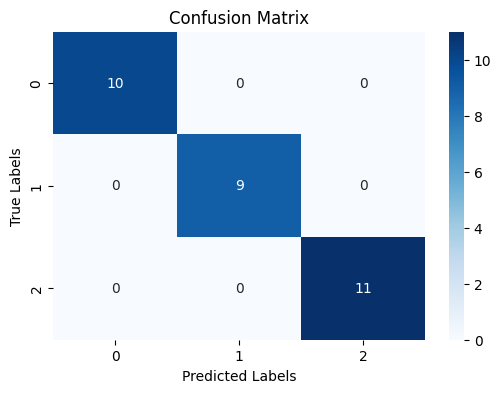

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Buat confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Jika kamu tahu nama kelas (opsional, agar lebih informatif)
# misalnya: Class_names = ['Negatif', 'Positif']
# maka tambahkan ke heatmap di bagian "xticklabels" dan "yticklabels"

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

7. Visualisasi Hasil Model SVM

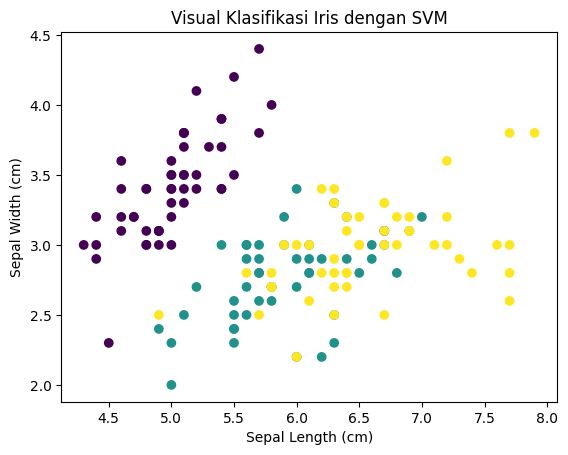

In [14]:
import matplotlib.pyplot as plt

plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Species'].astype('category').cat.codes)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Visual Klasifikasi Iris dengan SVM')
plt.show()

8. 3D Visualisasi Hasil Model SVM

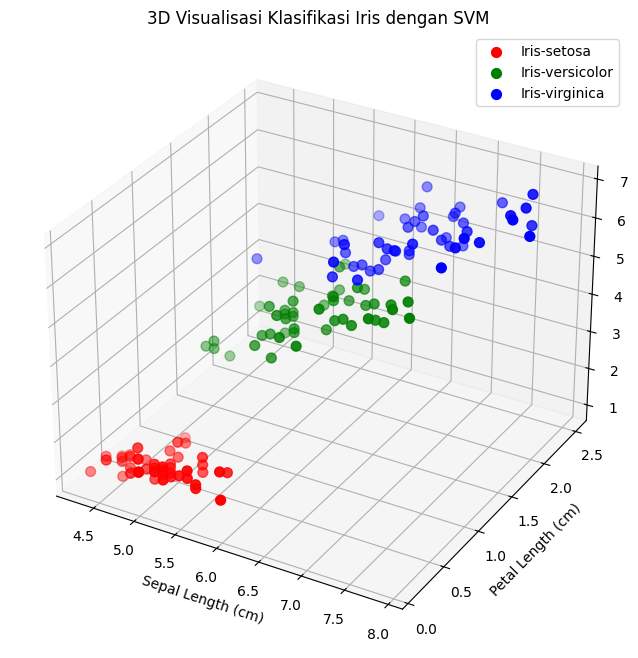

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# 3. Encode label (ubah teks jadi angka)
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])


# 8. Plot 3D hasil klasifikasi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap kelas
colors = ['r', 'g', 'b']
labels = le.classes_

# Plot tiap spesies dengan warna berbeda
for i, species in enumerate(labels):
    subset = df[df['SpeciesEncoded'] == i]
    ax.scatter(
        subset['SepalLengthCm'],
        subset['PetalWidthCm'],
        subset['PetalLengthCm'],
        color=colors[i],
        label=species,
        s=50
    )

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')
ax.set_title('3D Visualisasi Klasifikasi Iris dengan SVM')
ax.legend()
plt.show()

## PRAKTIKUM MANDIRI

1. Loading Dataset

In [16]:
# Membaca file csv dan menampilkan 5 bari data teratas
df = pd.read_csv('/content/drive/MyDrive/Praktikum_ML/Praktikum06/data/Credit Score Classification Dataset.csv')
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


*  Menampilkan infomasi umum dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


*  Menampilkan statistika deskriptif dari dataset

In [18]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


2. Data Processing


* Cek dan Hapus Data Duplikat

In [19]:
# Cek duplikat pada dataset
df.duplicated().sum()

np.int64(62)

In [20]:
# Menghapus data duplikat
df = df.drop_duplicates()

In [21]:
# Mengecek kembali data duplikat yang sudah dihapus
df.duplicated().sum()

np.int64(0)

*  Cek missing value

In [22]:
df.isnull().sum()

,0
Age,0
Gender,0
Income,0
Education,0
Marital Status,0
Number of Children,0
Home Ownership,0
Credit Score,0


3. Pemilihan Fitur

In [23]:
# Pisahkan fitur dan label (mengggunakan .copy() agar tidak memicu warning pada hasil encoding)
X = df[['Age', 'Gender', 'Income', 'Education',
        'Marital Status', 'Number of Children', 'Home Ownership']].copy()

y = df['Credit Score'].copy()

# Tampilkan 5 data pertama
print("Fitur (X):")
display(X.head())

print("\nLabel (y):")
display(y.head())

Fitur (X):


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
0,25,Female,50000,Bachelor's Degree,Single,0,Rented
1,30,Male,100000,Master's Degree,Married,2,Owned
2,35,Female,75000,Doctorate,Married,1,Owned
3,40,Male,125000,High School Diploma,Single,0,Owned
4,45,Female,100000,Bachelor's Degree,Married,3,Owned



Label (y):


,Credit Score
0,High
1,High
2,High
3,High
4,High


4. Encoding (Mengubah Data Kategorikal Jadi Numerik)

In [24]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
encoder = LabelEncoder()

# Ubah semua kolom kategorikal pada fitur (X) ke numerik
for col in X.select_dtypes(include='object').columns:
    X[col] = encoder.fit_transform(X[col])

# Encode label target
y = encoder.fit_transform(y)

# Tampilkan hasil setelah encoding
print("Setelah Encoding:")
display(X.head())


Setelah Encoding:


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
0,25,0,50000,1,1,0,1
1,30,1,100000,4,0,2,0
2,35,0,75000,2,0,1,0
3,40,1,125000,3,1,0,0
4,45,0,100000,1,0,3,0


5. Split dan Bangun Model SVM **bold text**

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Membagi dataset jadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model SVM dengan kernel linear
model = SVC(kernel='linear')

# Latih model dengan data training
model.fit(X_train, y_train)

SVC(kernel='linear')

6. Evaluasi Akurasi dan Laporan Klasifikasi

In [26]:
# Prediksi data uji
y_pred = model.predict(X_test)

# Hitung akurasi
print("Akurasi:", accuracy_score(y_test, y_pred))
# Laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.9047619047619048

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00         3

    accuracy                           0.90        21
   macro avg       0.89      0.89      0.89        21
weighted avg       0.90      0.90      0.90        21



7. Confusion Matrix


Confusion Matrix:
 [[ 3  1  0]
 [ 1 13  0]
 [ 0  0  3]]


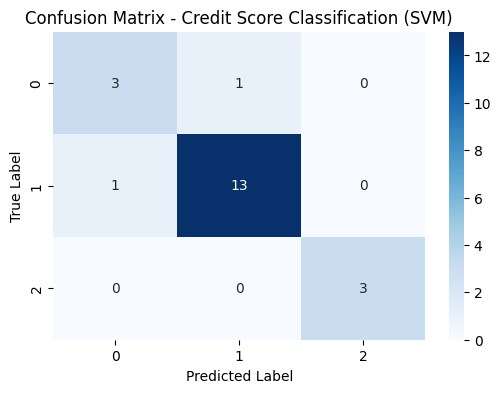

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Credit Score Classification (SVM)')
plt.show()

8. Visualisasi Hasil Model

*  Visualisasi 2D

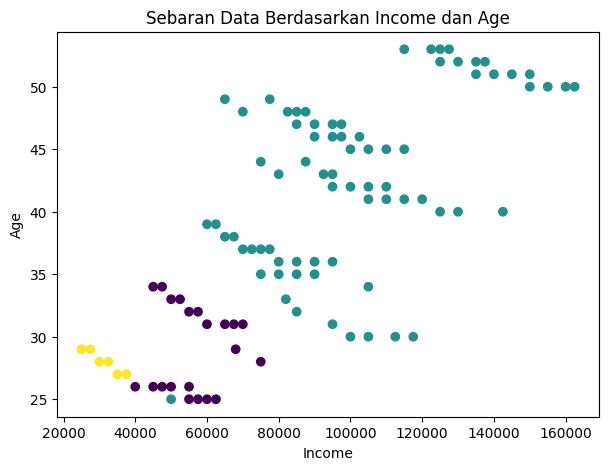

In [28]:
plt.figure(figsize=(7,5))
plt.scatter(X['Income'], X['Age'], c=y, cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Sebaran Data Berdasarkan Income dan Age')
plt.show()

* Visualisasi 3D

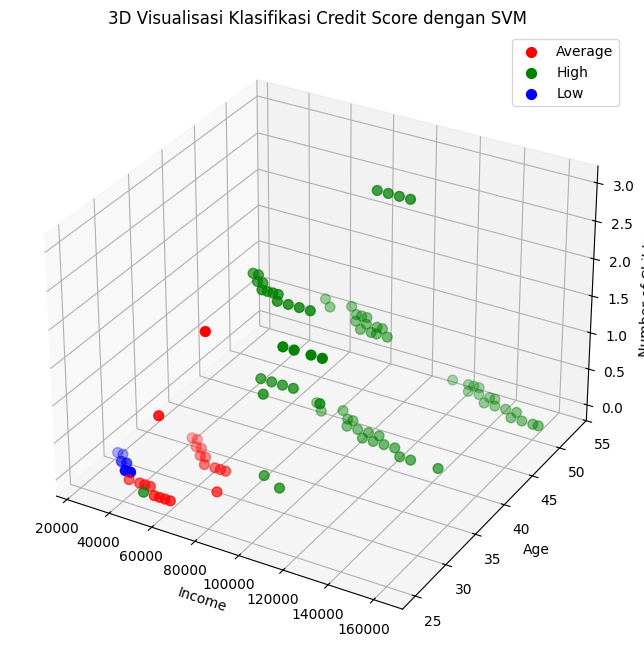

In [29]:
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Encode label target (Credit Score)
le = LabelEncoder()
df['CreditScoreEncoded'] = le.fit_transform(df['Credit Score'])

# 3D Plot hasil klasifikasi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap kelas Credit Score
colors = ['r', 'g', 'b']
labels = le.classes_

# Plot tiap kategori Credit Score dengan warna berbeda
for i, score in enumerate(labels):
    subset = df[df['CreditScoreEncoded'] == i]
    ax.scatter(
        subset['Income'],
        subset['Age'],
        subset['Number of Children'],
        color=colors[i],
        label=score,
        s=50
    )

# Label sumbu dan judul grafik
ax.set_xlabel('Income')
ax.set_ylabel('Age')
ax.set_zlabel('Number of Children')
ax.set_title('3D Visualisasi Klasifikasi Credit Score dengan SVM')
ax.legend()
plt.show()



In [29]:
from google.colab import drive
drive.mount('/content/drive')

!git config --global user.email "ariakristallnacht@gmail.com"
!git config --global user.name "Aria Kristallincht"

!git clone https://github.com/Ariakristallnacht/TI03_AriaKS_0110222076.git
%cd   TI03_AriaKS_0110222076

!cp -r /content/drive/MyDrive/Praktikum_ML/Praktikum06/ ./Praktikum06

!ls -lah

!git add .
!git commit -m "praktikum 6 ml"

from getpass import getpass
import os

token = getpass("Masukkan GitHub Token: ")

os.system(f'git remote set-url origin https://{token}@github.com/Ariakristallnacht/TI03_AriaKS_0110222076.git')

!git push origin main